# matt_ozone: take CMIP6 version and make it like CMIP5 for reading into coupled model.

# last edited 6 September 2018

conversion factor of 1.657 (48.0 g/mol(O3) / 28.96 g/mol(air)).

https://confluence.ecmwf.int/pages/viewpage.action?pageId=61121586

http://ozonedepletiontheory.info/ozone-distribution.html

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
Current Working Directory= /home/599/mac599/decadal
hostname= raijin5
Current Working Directory= /short/v19/mac599/ao_am2/sep18a
Processing CMIP5 monthly ozone ...
cmip5_input_ozone= ['/short/v19/mtc599/ao_am2/aug18b/INPUT/CM3_CMIP5_1850-2009_O3.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
[0.017000000923871994 0.03799999877810478 0.0689999982714653
 0.11500000208616257 0.17900000512599945 0.27399998903274536
 0.41499999165534973 0.6179999709129333 0.9100000262260437 1.0 1.5 2.0 3.0
 5.0 7.0 10.0 15.0 20.0 30.0 50.0 70.0 80.0 100.0 150.0 200.0 250.0 300.0
 400.0 500.0 600.0 700.0 850.0 1000.0]
calculate_quantity: value_split= ['latlon_region', ' 15', '15', ' 0', '36', ' 0', '71']
Diag= False
monthly_clim_anom: All years have 12 months.
cmip5_o3_monthlyanomaly_from_monthly.shape= (1920, 1, 37, 72)
cmip5_o3_monthlyclimatology_from_monthly.shape= (12, 1, 37, 72)
cmip5_o3_hov_xtramon.shape= (13, 37)
cmip6_inp

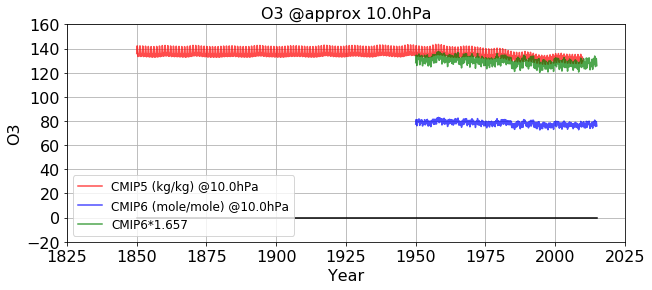

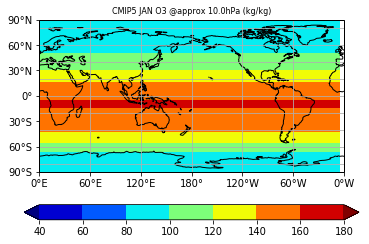

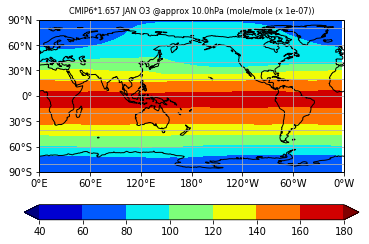

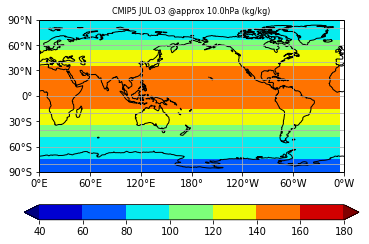

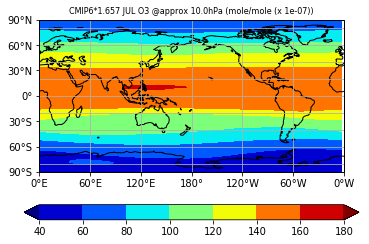

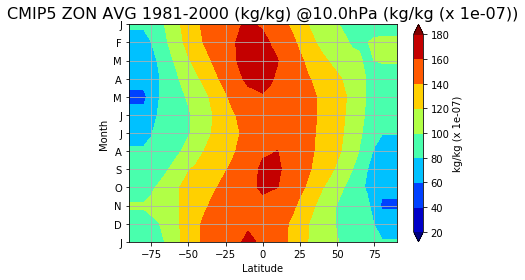

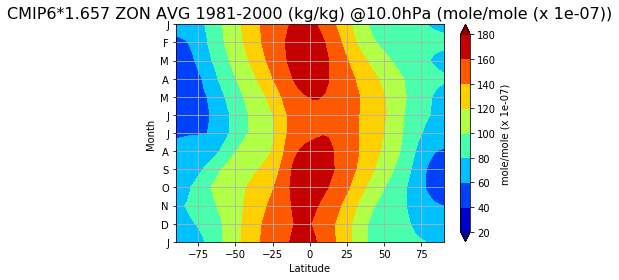

END


In [3]:
print('BEGIN')

import socket
import re
import os
import inspect
import shutil
import numpy as np
import numpy.ma as ma

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

os.chdir('/home/599/mac599/decadal')

print('Current Working Directory=',os.getcwd())

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  get_timestamp_number, \
  fractional_year_from_num2date, \
  plot_xy, \
  shade_2d_latlon, \
  shade_2d_simple

from n_data_funcs import n_data_funcs

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

hostname=socket.gethostname()

print('hostname=',hostname)

os.chdir('/short/v19/mac599/ao_am2/sep18a')

print('Current Working Directory=',os.getcwd())

#===============================================================================

cmip5_input_ozone=['/short/v19/mtc599/ao_am2/aug18b/INPUT/CM3_CMIP5_1850-2009_O3.nc'] #monthly data, all years 12 months. 
#pfull 0.017 -> 1000 (33 levels)

cmip6_input_ozone=['/g/data1/v14/tok599/atmos_forcing/CMIP6/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_195001-199912.nc', \
             '/g/data1/v14/tok599/atmos_forcing/CMIP6/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_200001-201412.nc'] #monthly data, all years 12 months
#plev 1000 -> 0.0001 (66 levels)

tmp_dir='/short/v14/mac599'

plot_plev=500.0
#plot_plev=1000.0
plot_plev=250.0
plot_plev=10.0

months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

#===============================================================================

print(CRED+'Processing CMIP5 monthly ozone ...'+CEND)

print('cmip5_input_ozone=',cmip5_input_ozone)

cmip5o3_monthly_files=n_data_funcs(input_files=[cmip5_input_ozone], input_var_name='ozone')

cmip5o3_monthly_files.calculate_filedatetime_info(calendar='noleap')

cmip5o3_monthly_files.get_latlon_info(Diag=False)

cmip5o3_monthly_files.get_lev_info(Diag=False, lev='pfull')

print(cmip5o3_monthly_files.lev)

cmip5o3_level = np.abs(cmip5o3_monthly_files.lev - plot_plev).argmin()

#cmip5_array1=ma.zeros((cmip5o3_monthly_files.nlev,cmip5o3_monthly_files.nlat),dtype=float)

#print('cmip5_array1.shape=',cmip5_array1.shape)

#print('cmip5o3_level=',cmip5o3_level)

#print(type(cmip5o3_level))

#print(cmip5o3_monthly_files.lev.index(plot_plev))

cmip5o3_monthly_o3_from_monthly = cmip5o3_monthly_files.calculate_quantity('dummy', \
  quantity='latlon_region, '+str(cmip5o3_level)+','+str(cmip5o3_level)+', 0,36, 0,71')

cmip5_o3_monthlyclimatology_from_monthly, cmip5_o3_monthlyanomaly_from_monthly = cmip5o3_monthly_files.monthly_clim_anom( \
  Diag=False, input=cmip5o3_monthly_o3_from_monthly, AnnOut=False, ZeroClim=True, cbeg=1981, cend=2000)
  
print('cmip5_o3_monthlyanomaly_from_monthly.shape=',cmip5_o3_monthlyanomaly_from_monthly.shape)
print('cmip5_o3_monthlyclimatology_from_monthly.shape=',cmip5_o3_monthlyclimatology_from_monthly.shape)

cmip5_o3_hov = np.average(np.squeeze(cmip5_o3_monthlyclimatology_from_monthly),axis=2) # no need to weight lon average.
cmip5_o3_hov_shape=cmip5_o3_hov.shape
cmip5_o3_hov_shape_xtramon=[cmip5_o3_hov_shape[0]+1,cmip5_o3_hov_shape[1]]
cmip5_o3_hov_xtramon=ma.zeros(cmip5_o3_hov_shape_xtramon,dtype=float)
cmip5_o3_hov_xtramon[0:cmip5_o3_hov_shape[0],:]=cmip5_o3_hov
cmip5_o3_hov_xtramon[cmip5_o3_hov_shape[0],:]=cmip5_o3_hov[0,:]

print('cmip5_o3_hov_xtramon.shape=',cmip5_o3_hov_xtramon.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

cmip6_input_ozone_new=[] #need to create nc3 versions so that MDDataset works...
for file in cmip6_input_ozone:
  cmip6_input_ozone_new.append(tmp_dir+'/'+os.path.basename(file))
  if(os.path.exists(file)):
    if(not os.path.exists(tmp_dir+'/'+os.path.basename(file))):
      #shutil.copy(file,tmp_dir+'/'+os.path.basename(file))
      command='nccopy -k nc3 '+file+' '+tmp_dir+'/'+os.path.basename(file)
      print('command=',command)
      os.system(command)

print('cmip6_input_ozone_new=',cmip6_input_ozone_new)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
#cmip6_input_ozone = cmip6_input_ozone_new #override

print(CRED+'Processing CMIP6 monthly ozone ...'+CEND)

cmip6o3_monthly_files=n_data_funcs(input_files=[cmip6_input_ozone_new], input_var_name='vmro3')

cmip6o3_monthly_files.calculate_filedatetime_info(calendar='365_day')

cmip6o3_monthly_files.get_latlon_info(Diag=False)

cmip6o3_monthly_files.get_lev_info(Diag=False, lev='plev')

print(cmip6o3_monthly_files.lev)

cmip6o3_level = np.abs(cmip6o3_monthly_files.lev - plot_plev).argmin()

#print('cmip6o3_level=',cmip6o3_level)

cmip6o3_monthly_o3_from_monthly = cmip6o3_monthly_files.calculate_quantity('dummy', \
  quantity='latlon_region, '+str(cmip6o3_level)+','+str(cmip6o3_level)+', 0,95, 0,143')

cmip6_o3_monthlyclimatology_from_monthly, cmip6_o3_monthlyanomaly_from_monthly = cmip6o3_monthly_files.monthly_clim_anom( \
  Diag=False, input=cmip6o3_monthly_o3_from_monthly, AnnOut=False, ZeroClim=True, cbeg=1981, cend=2000)
  
print('cmip6_o3_monthlyanomaly_from_monthly.shape=',cmip6_o3_monthlyanomaly_from_monthly.shape)
print('cmip6_o3_monthlyclimatology_from_monthly.shape=',cmip6_o3_monthlyclimatology_from_monthly.shape)
  
cmip6_o3_hov = np.average(np.squeeze(cmip6_o3_monthlyclimatology_from_monthly),axis=2) # no need to weight lon average.
cmip6_o3_hov_shape=cmip6_o3_hov.shape
cmip6_o3_hov_shape_xtramon=[cmip6_o3_hov_shape[0]+1,cmip6_o3_hov_shape[1]]
cmip6_o3_hov_xtramon=ma.zeros(cmip6_o3_hov_shape_xtramon,dtype=float)
cmip6_o3_hov_xtramon[0:cmip6_o3_hov_shape[0],:]=cmip6_o3_hov
cmip6_o3_hov_xtramon[cmip6_o3_hov_shape[0],:]=cmip6_o3_hov[0,:]

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================
#do some plots. Time-series as well as climatological ones at different pressure levels...

cmip6_conversion=1.657 #to get into same units as cmip5 (mole/mole to kg/kg).
scale=1e7

input_datas = (np.average(np.average(np.squeeze(cmip5_o3_monthlyanomaly_from_monthly[:]),axis=1,weights=cmip5o3_monthly_files.clat[:]),axis=1)*scale,)
input_xvals = (cmip5o3_monthly_files.year_fraction_anomaly,)

input_datas = input_datas + (np.average(np.average(np.squeeze(cmip6_o3_monthlyanomaly_from_monthly[:]),axis=1,weights=cmip6o3_monthly_files.clat[:]),axis=1)*scale,)
input_xvals = input_xvals + (cmip6o3_monthly_files.year_fraction_anomaly,)

input_datas = input_datas + (np.average(np.average(np.squeeze(cmip6_o3_monthlyanomaly_from_monthly[:]),axis=1,weights=cmip6o3_monthly_files.clat[:]),axis=1)*scale*cmip6_conversion,)
input_xvals = input_xvals + (cmip6o3_monthly_files.year_fraction_anomaly,)

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='O3 @approx '+str(plot_plev)+'hPa', \
  units='various', \
  xlab='Year', \
  ylab='O3', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue','green'], \
  line_labels=['CMIP5 (kg/kg) @'+str(cmip5o3_monthly_files.lev[cmip5o3_level])+'hPa', \
               'CMIP6 (mole/mole) @'+str(cmip6o3_monthly_files.lev[cmip6o3_level])+'hPa', \
               'CMIP6*'+str(cmip6_conversion)], \
  grid=True, \
  legend_position='lower left', \
  legend_fontsize='large', \
  xysize=(10,4))

clevs=None

# clevs=[0,1,2,3,4,5]
# clevs=[0,10,20,30,40,50]
clevs=[40,60,80,100,120,140,160,180]

#===============================================================================
#January
month_index=0
shade_2d_latlon(cmip5_o3_monthlyclimatology_from_monthly[month_index,0,]*scale, \
  xyvals=(cmip5o3_monthly_files.lon[:],cmip5o3_monthly_files.lat[:]), \
  clevs=clevs, \
  title='CMIP5 '+months[month_index]+' O3 @approx '+str(plot_plev)+'hPa', \
  units='kg/kg', \
  title_fontsize=8.0, \
  cmap='jet' \
  )

shade_2d_latlon(cmip6_o3_monthlyclimatology_from_monthly[month_index,0,]*scale*cmip6_conversion, \
  xyvals=(cmip6o3_monthly_files.lon[:],cmip6o3_monthly_files.lat[:]), \
  clevs=clevs, \
  title='CMIP6*'+str(cmip6_conversion)+' '+months[month_index]+' O3 @approx '+str(plot_plev)+'hPa', \
  units='mole/mole (x '+str(1./scale)+')', \
  title_fontsize=8.0, \
  cmap='jet' \
  )

#===============================================================================
#July
month_index=6
shade_2d_latlon(cmip5_o3_monthlyclimatology_from_monthly[month_index,0,]*scale, \
  xyvals=(cmip5o3_monthly_files.lon[:],cmip5o3_monthly_files.lat[:]), \
  clevs=clevs, \
  title='CMIP5 '+months[month_index]+' O3 @approx '+str(plot_plev)+'hPa', \
  units='kg/kg', \
  title_fontsize=8.0, \
  cmap='jet' \
  )

shade_2d_latlon(cmip6_o3_monthlyclimatology_from_monthly[month_index,0,]*scale*cmip6_conversion, \
  xyvals=(cmip6o3_monthly_files.lon[:],cmip6o3_monthly_files.lat[:]), \
  clevs=clevs, \
  title='CMIP6*'+str(cmip6_conversion)+' '+months[month_index]+' O3 @approx '+str(plot_plev)+'hPa', \
  units='mole/mole (x '+str(1/scale)+')', \
  title_fontsize=8.0, \
  cmap='jet' \
  )
#===============================================================================

clevs=None
step=20;clevs=sorted(list(set(np.arange(20, 180+step, step).tolist())))

shade_2d_simple( \
                cmip5_o3_hov_xtramon*scale, \
                title='CMIP5 ZON AVG 1981-2000 (kg/kg) @'+str(cmip5o3_monthly_files.lev[cmip5o3_level])+'hPa', \
                units='kg/kg (x '+str(1/scale)+')', \
                xyvals=(cmip5o3_monthly_files.lat, range(0,13)), \
                add_contours=False, \
                clevs=clevs, \
                extend='both', \
                cmap='jet', \
                reverse_yaxis=True, \
                ylab='Month', \
                xlab='Latitude',
                xlim=[-90,90], \
                grid=True, \
                ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']))
                
shade_2d_simple( \
                cmip6_o3_hov_xtramon*scale*cmip6_conversion, \
                title='CMIP6*'+str(cmip6_conversion)+' ZON AVG 1981-2000 (kg/kg) @'+str(cmip6o3_monthly_files.lev[cmip6o3_level])+'hPa', \
                units='mole/mole (x '+str(1/scale)+')', \
                xyvals=(cmip6o3_monthly_files.lat, range(0,13)), \
                add_contours=False, \
                clevs=clevs, \
                extend='both', \
                cmap='jet', \
                reverse_yaxis=True, \
                ylab='Month', \
                xlab='Latitude',
                xlim=[-90,90], \
                grid=True, \
                ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']))
                
#===============================================================================

print('END')

BEGIN
Processing CMIP5 monthly ozone ...
cmip5_input_ozone= ['/short/v19/mtc599/ao_am2/aug18b/INPUT/CM3_CMIP5_1850-2009_O3.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
55S,50S,50N,55N= 7 8 28 29 6 0
[0.017000000923871994 0.03799999877810478 0.0689999982714653
 0.11500000208616257 0.17900000512599945 0.27399998903274536
 0.41499999165534973 0.6179999709129333 0.9100000262260437 1.0 1.5 2.0 3.0
 5.0 7.0 10.0 15.0 20.0 30.0 50.0 70.0 80.0 100.0 150.0 200.0 250.0 300.0
 400.0 500.0 600.0 700.0 850.0 1000.0]
cmip5_array1,2SH,3,4.shape,= (33, 37) (33, 1920) (33, 160) (33,)
lev= 0
calculate_quantity: value_split= ['latlon_region', ' 0', '0', ' 0', '36', ' 0', '71']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip5_o3_annualanomaly_from_monthly.shape= (160, 1, 37, 72)
cmip5_o3_annualclimatology_from_monthly.shape= (1, 37, 72)
cmip5_o3_monthlyanomaly_

Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip5_o3_annualanomaly_from_monthly.shape= (160, 1, 37, 72)
cmip5_o3_annualclimatology_from_monthly.shape= (1, 37, 72)
cmip5_o3_monthlyanomaly_from_monthly.shape= (1920, 1, 37, 72)
cmip5_o3_monthlyclimatology_from_monthly.shape= (12, 1, 37, 72)
lev= 18
calculate_quantity: value_split= ['latlon_region', ' 18', '18', ' 0', '36', ' 0', '71']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip5_o3_annualanomaly_from_monthly.shape= (160, 1, 37, 72)
cmip5_o3_annualclimatology_from_monthly.shape= (1, 37, 72)
cmip5_o3_monthlyanomaly_from_monthly.shape= (1920, 1, 37, 72)
cmip5_o3_monthlyclimatology_from_monthly.shape= (12, 1, 37, 72)
lev= 19
calculate_quantity: value_split= ['latlon_region', ' 19', '19', ' 0', '36', ' 0', '71']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: Al

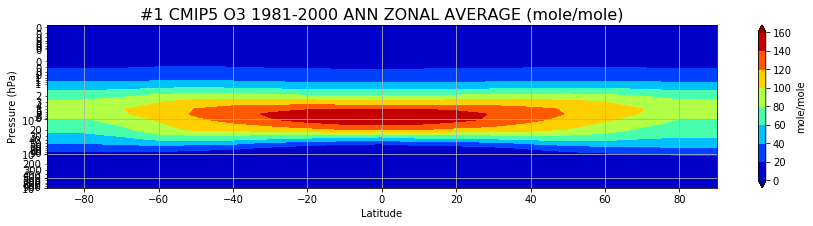

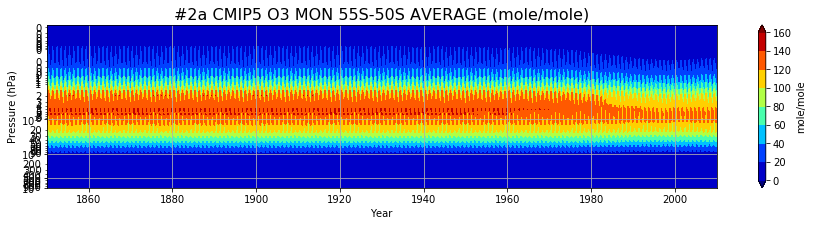

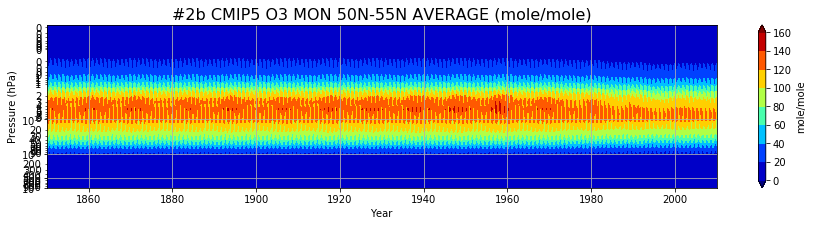

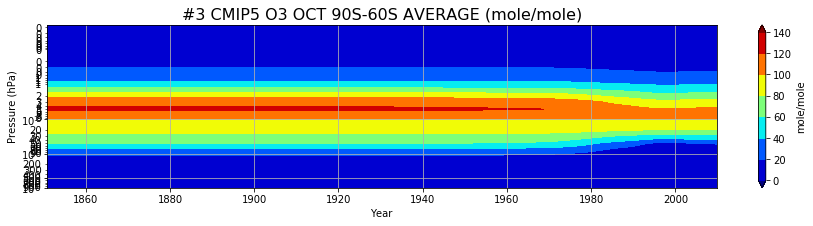

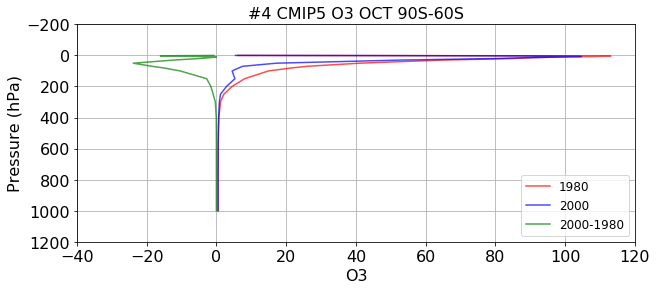

END


In [196]:
print('BEGIN')

'''
generate some ozone diagnostics/plots
'''

#===============================================================================

print(CRED+'Processing CMIP5 monthly ozone ...'+CEND)

print('cmip5_input_ozone=',cmip5_input_ozone)

cmip5o3_monthly_files=n_data_funcs(input_files=[cmip5_input_ozone], input_var_name='ozone')

cmip5o3_monthly_files.calculate_filedatetime_info(calendar='noleap')

cmip5o3_monthly_files.get_latlon_info(Diag=False)

cmip5o3_50N = np.abs(cmip5o3_monthly_files.lat - 50.).argmin()
cmip5o3_55N = np.abs(cmip5o3_monthly_files.lat - 55.).argmin()
cmip5o3_50S = np.abs(cmip5o3_monthly_files.lat - -50.).argmin()
cmip5o3_55S = np.abs(cmip5o3_monthly_files.lat - -55.).argmin()
cmip5o3_60S = np.abs(cmip5o3_monthly_files.lat - -60.).argmin()
cmip5o3_90S = np.abs(cmip5o3_monthly_files.lat - -90.).argmin()

print('55S,50S,50N,55N=',cmip5o3_55S,cmip5o3_50S,cmip5o3_50N,cmip5o3_55N,cmip5o3_60S,cmip5o3_90S)

cmip5o3_monthly_files.get_lev_info(Diag=False, lev='pfull')

print(cmip5o3_monthly_files.lev)

cmip5_array1=ma.zeros((cmip5o3_monthly_files.nlev, cmip5o3_monthly_files.nlat), dtype=float)

cmip5_array2NH=ma.zeros((cmip5o3_monthly_files.nlev, cmip5o3_monthly_files.ntime_tfreq), dtype=float)

cmip5_array2SH=ma.zeros((cmip5o3_monthly_files.nlev, cmip5o3_monthly_files.ntime_tfreq), dtype=float)

cmip5_array3=ma.zeros((cmip5o3_monthly_files.nlev, int(cmip5o3_monthly_files.ntime_tfreq/12)), dtype=float)

cmip5_array41980=ma.zeros((cmip5o3_monthly_files.nlev), dtype=float)

cmip5_array42000=ma.zeros((cmip5o3_monthly_files.nlev), dtype=float)

print('cmip5_array1,2SH,3,4.shape,=',cmip5_array1.shape, cmip5_array2SH.shape, cmip5_array3.shape, cmip5_array4.shape)

for lev in range(cmip5o3_monthly_files.nlev):
  print('lev=',lev)

  cmip5o3_monthly_o3_from_monthly = cmip5o3_monthly_files.calculate_quantity('dummy', \
    quantity='latlon_region, '+str(lev)+','+str(lev)+', 0,36, 0,71')

  cmip5_o3_annualclimatology_from_monthly, cmip5_o3_annualanomaly_from_monthly = cmip5o3_monthly_files.monthly_clim_anom( \
    Diag=False, input=cmip5o3_monthly_o3_from_monthly, AnnOut=True, ZeroClim=True, cbeg=1981, cend=2000)

  cmip5_o3_monthlyclimatology_from_monthly, cmip5_o3_monthlyanomaly_from_monthly = cmip5o3_monthly_files.monthly_clim_anom( \
  Diag=False, input=cmip5o3_monthly_o3_from_monthly, AnnOut=False, ZeroClim=True, cbeg=1981, cend=2000)
    
  print('cmip5_o3_annualanomaly_from_monthly.shape=',cmip5_o3_annualanomaly_from_monthly.shape)
  print('cmip5_o3_annualclimatology_from_monthly.shape=',cmip5_o3_annualclimatology_from_monthly.shape)
  
  print('cmip5_o3_monthlyanomaly_from_monthly.shape=',cmip5_o3_monthlyanomaly_from_monthly.shape)
  print('cmip5_o3_monthlyclimatology_from_monthly.shape=',cmip5_o3_monthlyclimatology_from_monthly.shape)
  
  cmip5_array1[lev,:] = np.average(np.squeeze(cmip5_o3_annualclimatology_from_monthly),axis=1)
  
  cmip5_array2SH[lev,:] = \
    np.squeeze(np.average(np.average(cmip5_o3_monthlyanomaly_from_monthly[:,:,cmip5o3_55S:cmip5o3_50S+1,:],axis=2, \
    weights=cmip5o3_monthly_files.lat[cmip5o3_55S:cmip5o3_50S+1]),axis=2))

  cmip5_array2NH[lev,:] = \
    np.squeeze(np.average(np.average(cmip5_o3_monthlyanomaly_from_monthly[:,:,cmip5o3_50N:cmip5o3_55N+1,:],axis=2, \
    weights=cmip5o3_monthly_files.lat[cmip5o3_50N:cmip5o3_55N+1]),axis=2))

  if(lev==0):
    month_list=[]
    for d,date_time_stamp_now in enumerate(cmip5o3_monthly_files.date_time_stamp_tfreq):
      month_list.append(date_time_stamp_now.month)
    npmonth_list=np.array(month_list)
    cmip5_oct_months,=np.where(npmonth_list==10) #note comma
    #print('oct_months=',oct_months)
    
    cmip5_years_months_from_monthly=[]
    for cnt in range(cmip5o3_monthly_files.date_time_stamp_anomaly.size):
      cmip5_years_months_from_monthly.append(cmip5o3_monthly_files.date_time_stamp_anomaly[cnt].year*100 \
        +cmip5o3_monthly_files.date_time_stamp_anomaly[cnt].month)

    #print(cmip5_years_months_from_monthly)
    
    cmip5_October1980=cmip5_years_months_from_monthly.index(198010)
    cmip5_October2000=cmip5_years_months_from_monthly.index(200010)
    
    print('cmip5_October1980,cmip5_October2000=',cmip5_October1980,cmip5_October2000)
    #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cmip5_array3[lev,:] = \
    np.squeeze(np.average(np.average(cmip5_o3_monthlyanomaly_from_monthly[cmip5_oct_months,:,cmip5o3_90S:cmip5o3_60S+1,:],axis=2, \
    weights=cmip5o3_monthly_files.lat[cmip5o3_90S:cmip5o3_60S+1]),axis=2))
    
  cmip5_array41980[lev] = \
    np.squeeze(np.average(np.average(cmip5_o3_monthlyanomaly_from_monthly[cmip5_October1980,:,cmip5o3_90S:cmip5o3_60S+1,:],axis=1,
    weights=cmip5o3_monthly_files.lat[cmip5o3_90S:cmip5o3_60S+1]),axis=1))

  cmip5_array42000[lev] = \
    np.squeeze(np.average(np.average(cmip5_o3_monthlyanomaly_from_monthly[cmip5_October2000,:,cmip5o3_90S:cmip5o3_60S+1,:],axis=1,
    weights=cmip5o3_monthly_files.lat[cmip5o3_90S:cmip5o3_60S+1]),axis=1))
    
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#do some plots.

#1.
xysize=(15,3)
  
shade_2d_simple(cmip5_array1*1e7, \
  title='#1 CMIP5 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='mole/mole', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.lat, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#2.
shade_2d_simple(cmip5_array2SH*1e7, \
  title='#2a CMIP5 O3 MON 55S-50S AVERAGE', \
  units='mole/mole', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.year_fraction_anomaly, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

shade_2d_simple(cmip5_array2NH*1e7, \
  title='#2b CMIP5 O3 MON 50N-55N AVERAGE', \
  units='mole/mole', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.year_fraction_anomaly, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#3.
shade_2d_simple(cmip5_array3*1e7, \
  title='#3 CMIP5 O3 OCT 90S-60S AVERAGE', \
  units='mole/mole', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.year_fraction_anomaly[cmip5_oct_months], cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#4.
input_datas = (cmip5_array41980[:]*1e7,)
input_xvals = (cmip5o3_monthly_files.lev,)

input_datas = input_datas + (cmip5_array42000[:]*1e7,)
input_xvals = input_xvals + (cmip5o3_monthly_files.lev,)

input_datas = input_datas + ((cmip5_array42000[:]-cmip5_array41980[:])*1e7,)
input_xvals = input_xvals + (cmip5o3_monthly_files.lev,)

plot_xy(Diag=False, input_data=input_xvals, input_xvals=input_datas, \
  title='#4 CMIP5 O3 OCT 90S-60S', \
  units='mole/mole', \
  xlab='O3', \
  ylab='Pressure (hPa)', \
#   zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=True, \
  line_colors=['red','blue','green'], \
  line_labels=['1980','2000','2000-1980'], \
  grid=True, \
#   legend_position='lower left', \
  legend_fontsize='large', \
  xysize=(10,4))

#===============================================================================

print('END')

BEGIN
Processing CMIP6 monthly ozone ...
cmip6_input_ozone_new= ['/short/v14/mac599/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_195001-199912.nc', '/short/v14/mac599/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_200001-201412.nc']
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 2: no ensembles, multiple input files.
55S,50S,50N,55N= 18 21 74 77 16 0
[1000.0 925.0 850.0 800.0 780.0 750.0 700.0 650.0 600.0 500.0 450.0 400.0
 350.0 300.0 285.0 250.0 200.0 170.0 150.0 130.0 115.0 100.0 90.0 80.0 70.0
 60.0 50.0 40.0 35.0 30.0 25.0 20.0 15.0 10.0 7.0 5.0 4.0 3.0 2.0 1.5 1.0
 0.7 0.5 0.4 0.3 0.2 0.15 0.1 0.07 0.05 0.04 0.03 0.02 0.015 0.01 0.007
 0.005 0.004 0.003 0.002 0.0015 0.001 0.0008 0.0005 0.0003 0.0001]
cmip6_array1,2SH,3,4.shape,= (66, 96) (66, 780) (66, 65) (66,)
lev= 0
calculate_quantity: value_split= ['latlon_region', ' 0', '0', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthl

Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 17
calculate_quantity: value_split= ['latlon_region', ' 17', '17', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 18
calculate_quantity: value_split= ['latlon_region', ' 18', '18', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_an

Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 35
calculate_quantity: value_split= ['latlon_region', ' 35', '35', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 36
calculate_quantity: value_split= ['latlon_region', ' 36', '36', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_an

Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 53
calculate_quantity: value_split= ['latlon_region', ' 53', '53', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
cmip6_o3_annualanomaly_from_monthly.shape= (65, 1, 96, 144)
cmip6_o3_annualclimatology_from_monthly.shape= (1, 96, 144)
cmip6_o3_monthlyanomaly_from_monthly.shape= (780, 1, 96, 144)
cmip6_o3_monthlyclimatology_from_monthly.shape= (12, 1, 96, 144)
lev= 54
calculate_quantity: value_split= ['latlon_region', ' 54', '54', ' 0', '95', ' 0', '143']
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_an

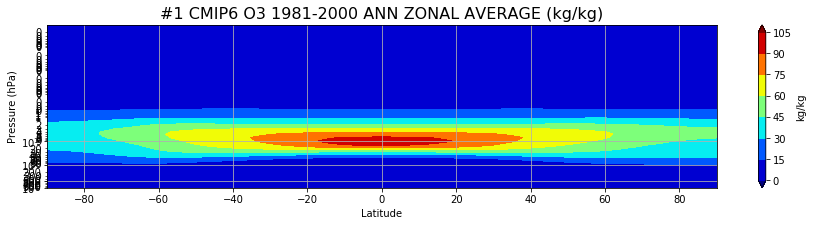

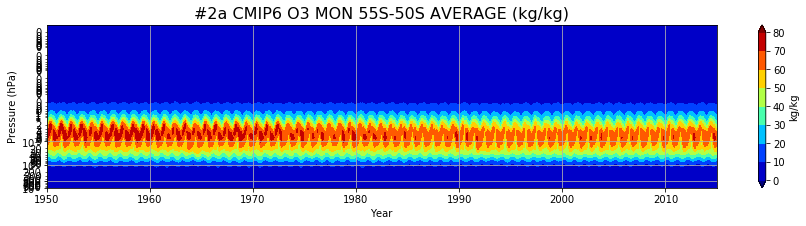

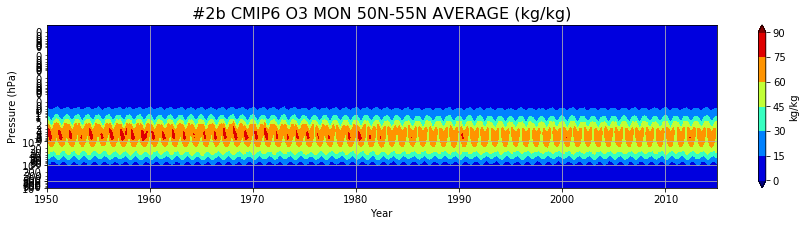

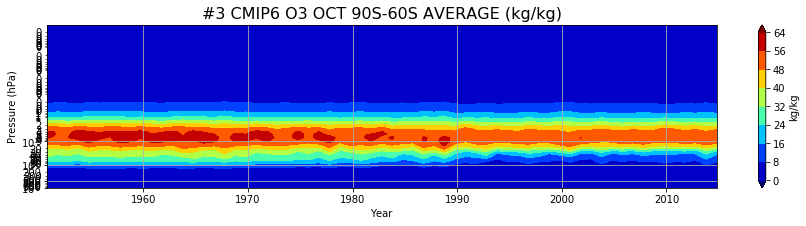

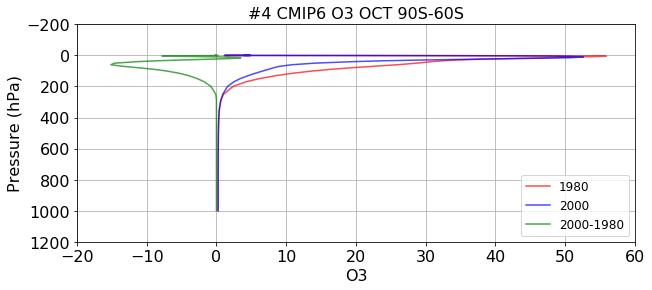

END


In [197]:
print('BEGIN')

'''
generate some ozone diagnostics/plots
'''

#===============================================================================

print(CRED+'Processing CMIP6 monthly ozone ...'+CEND)

print('cmip6_input_ozone_new=',cmip6_input_ozone_new)

cmip6o3_monthly_files=n_data_funcs(input_files=[cmip6_input_ozone_new], input_var_name='vmro3')

cmip6o3_monthly_files.calculate_filedatetime_info(calendar='365_day')

cmip6o3_monthly_files.get_latlon_info(Diag=False)

cmip6o3_50N = np.abs(cmip6o3_monthly_files.lat - 50.).argmin()
cmip6o3_55N = np.abs(cmip6o3_monthly_files.lat - 55.).argmin()
cmip6o3_50S = np.abs(cmip6o3_monthly_files.lat - -50.).argmin()
cmip6o3_55S = np.abs(cmip6o3_monthly_files.lat - -55.).argmin()
cmip6o3_60S = np.abs(cmip6o3_monthly_files.lat - -60.).argmin()
cmip6o3_90S = np.abs(cmip6o3_monthly_files.lat - -90.).argmin()

print('55S,50S,50N,55N=',cmip6o3_55S,cmip6o3_50S,cmip6o3_50N,cmip6o3_55N,cmip6o3_60S,cmip6o3_90S)

cmip6o3_monthly_files.get_lev_info(Diag=False, lev='plev')

print(cmip6o3_monthly_files.lev)

cmip6_array1=ma.zeros((cmip6o3_monthly_files.nlev, cmip6o3_monthly_files.nlat), dtype=float)

cmip6_array2NH=ma.zeros((cmip6o3_monthly_files.nlev, cmip6o3_monthly_files.ntime_tfreq), dtype=float)

cmip6_array2SH=ma.zeros((cmip6o3_monthly_files.nlev, cmip6o3_monthly_files.ntime_tfreq), dtype=float)

cmip6_array3=ma.zeros((cmip6o3_monthly_files.nlev, int(cmip6o3_monthly_files.ntime_tfreq/12)), dtype=float)

cmip6_array41980=ma.zeros((cmip6o3_monthly_files.nlev), dtype=float)

cmip6_array42000=ma.zeros((cmip6o3_monthly_files.nlev), dtype=float)

print('cmip6_array1,2SH,3,4.shape,=',cmip6_array1.shape, cmip6_array2SH.shape, cmip6_array3.shape, cmip6_array41980.shape)

for lev in range(cmip6o3_monthly_files.nlev):
  print('lev=',lev)

  cmip6o3_monthly_o3_from_monthly = cmip6o3_monthly_files.calculate_quantity('dummy', \
    quantity='latlon_region, '+str(lev)+','+str(lev)+', 0,95, 0,143')

  cmip6_o3_annualclimatology_from_monthly, cmip6_o3_annualanomaly_from_monthly = cmip6o3_monthly_files.monthly_clim_anom( \
    Diag=False, input=cmip6o3_monthly_o3_from_monthly, AnnOut=True, ZeroClim=True, cbeg=1981, cend=2000)

  cmip6_o3_monthlyclimatology_from_monthly, cmip6_o3_monthlyanomaly_from_monthly = cmip6o3_monthly_files.monthly_clim_anom( \
  Diag=False, input=cmip6o3_monthly_o3_from_monthly, AnnOut=False, ZeroClim=True, cbeg=1981, cend=2000)
    
  print('cmip6_o3_annualanomaly_from_monthly.shape=',cmip6_o3_annualanomaly_from_monthly.shape)
  print('cmip6_o3_annualclimatology_from_monthly.shape=',cmip6_o3_annualclimatology_from_monthly.shape)
  
  print('cmip6_o3_monthlyanomaly_from_monthly.shape=',cmip6_o3_monthlyanomaly_from_monthly.shape)
  print('cmip6_o3_monthlyclimatology_from_monthly.shape=',cmip6_o3_monthlyclimatology_from_monthly.shape)
  
  cmip6_array1[lev,:] = np.average(np.squeeze(cmip6_o3_annualclimatology_from_monthly),axis=1)
  
  cmip6_array2SH[lev,:] = \
    np.squeeze(np.average(np.average(cmip6_o3_monthlyanomaly_from_monthly[:,:,cmip6o3_55S:cmip6o3_50S+1,:],axis=2, \
    weights=cmip6o3_monthly_files.lat[cmip6o3_55S:cmip6o3_50S+1]),axis=2))

  cmip6_array2NH[lev,:] = \
    np.squeeze(np.average(np.average(cmip6_o3_monthlyanomaly_from_monthly[:,:,cmip6o3_50N:cmip6o3_55N+1,:],axis=2, \
    weights=cmip6o3_monthly_files.lat[cmip6o3_50N:cmip6o3_55N+1]),axis=2))

  if(lev==0):
    month_list=[]
    for d,date_time_stamp_now in enumerate(cmip6o3_monthly_files.date_time_stamp_tfreq):
      month_list.append(date_time_stamp_now.month)
    npmonth_list=np.array(month_list)
    cmip6_oct_months,=np.where(npmonth_list==10) #note comma
    #print('oct_months=',oct_months)
    
    cmip6_years_months_from_monthly=[]
    for cnt in range(cmip6o3_monthly_files.date_time_stamp_anomaly.size):
      cmip6_years_months_from_monthly.append(cmip6o3_monthly_files.date_time_stamp_anomaly[cnt].year*100+ \
        cmip6o3_monthly_files.date_time_stamp_anomaly[cnt].month)

    #print(cmip6_years_months_from_monthly)
    
    cmip6_October1980=cmip6_years_months_from_monthly.index(198010)
    cmip6_October2000=cmip6_years_months_from_monthly.index(200010)
    
    print('cmip6_October1980,cmip6_October2000=',cmip6_October1980,cmip6_October2000)
    #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  cmip6_array3[lev,:] = \
    np.squeeze(np.average(np.average(cmip6_o3_monthlyanomaly_from_monthly[cmip6_oct_months,:,cmip6o3_90S:cmip6o3_60S+1,:],axis=2, \
    weights=cmip6o3_monthly_files.lat[cmip6o3_90S:cmip6o3_60S+1]),axis=2))
    
  cmip6_array41980[lev] = \
    np.squeeze(np.average(np.average(cmip6_o3_monthlyanomaly_from_monthly[cmip6_October1980,:,cmip6o3_90S:cmip6o3_60S+1,:],axis=1,
    weights=cmip6o3_monthly_files.lat[cmip6o3_90S:cmip6o3_60S+1]),axis=1))

  cmip6_array42000[lev] = \
    np.squeeze(np.average(np.average(cmip6_o3_monthlyanomaly_from_monthly[cmip6_October2000,:,cmip6o3_90S:cmip6o3_60S+1,:],axis=1,
    weights=cmip6o3_monthly_files.lat[cmip6o3_90S:cmip6o3_60S+1]),axis=1))
    
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================
#do some plots.

#1.
xysize=(15,3)
  
shade_2d_simple(cmip6_array1*1e7, \
  title='#1 CMIP6 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip6o3_monthly_files.lat, cmip6o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#2.
shade_2d_simple(cmip6_array2SH*1e7, \
  title='#2a CMIP6 O3 MON 55S-50S AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip6o3_monthly_files.year_fraction_anomaly, cmip6o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

shade_2d_simple(cmip6_array2NH*1e7, \
  title='#2b CMIP6 O3 MON 50N-55N AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip6o3_monthly_files.year_fraction_anomaly, cmip6o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#3.
shade_2d_simple(cmip6_array3*1e7, \
  title='#3 CMIP6 O3 OCT 90S-60S AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip6o3_monthly_files.year_fraction_anomaly[cmip6_oct_months], cmip6o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Year', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

#4.
input_datas = (cmip6_array41980[:]*1e7,)
input_xvals = (cmip6o3_monthly_files.lev,)

input_datas = input_datas + (cmip6_array42000[:]*1e7,)
input_xvals = input_xvals + (cmip6o3_monthly_files.lev,)

input_datas = input_datas + ((cmip6_array42000[:]-cmip6_array41980[:])*1e7,)
input_xvals = input_xvals + (cmip6o3_monthly_files.lev,)

plot_xy(Diag=False, input_data=input_xvals, input_xvals=input_datas, \
  title='#4 CMIP6 O3 OCT 90S-60S', \
  units='kg/kg', \
  xlab='O3', \
  ylab='Pressure (hPa)', \
#   zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=True, \
  line_colors=['red','blue','green'], \
  line_labels=['1980','2000','2000-1980'], \
  grid=True, \
#   legend_position='lower left', \
  legend_fontsize='large', \
  xysize=(10,4))

#===============================================================================

print('END')

BEGIN


jupyter_notebook:32: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


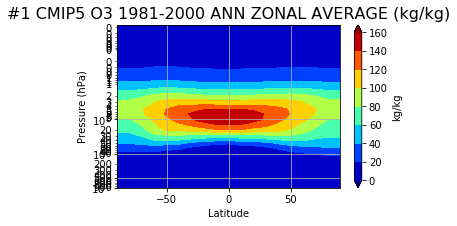

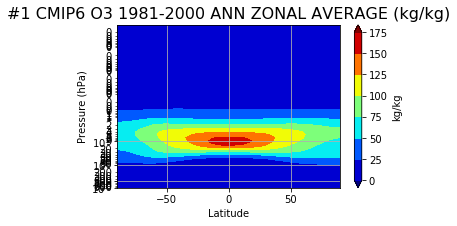

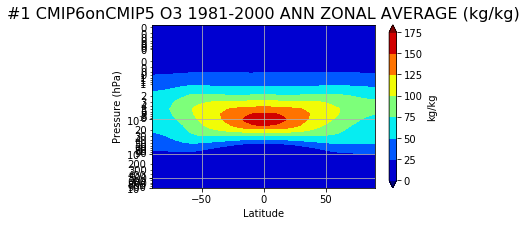

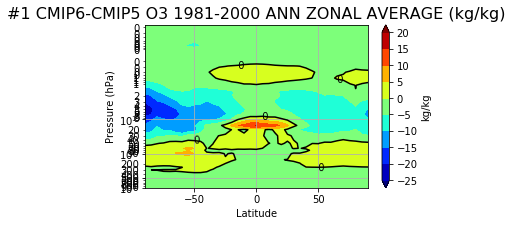

END


In [147]:
print('BEGIN')

'''
CMIP5/CMIP6 difference plots, convert CMIP6 to kg/kg used in the model and CMIP5 set.

'''

from matplotlib.mlab import griddata

#print('cmip5_array1.shape=',cmip5_array1.shape)
#print('cmip6_array1.shape=',cmip6_array1.shape)

#print('cmip6o3_monthly_files.lev.shape=',cmip6o3_monthly_files.lev.shape)
#print('cmip6o3_monthly_files.lat.shape=',cmip6o3_monthly_files.lat.shape)

cmip6_lats2d_tmp=np.expand_dims(cmip6o3_monthly_files.lat,0)

#print('cmip6_lats2d_tmp.shape=',cmip6_lats2d_tmp.shape)

cmip6_lats2df=np.tile(cmip6_lats2d_tmp, (cmip6o3_monthly_files.nlev,1)).flatten()

#print('cmip6_lats2df.shape=',cmip6_lats2df.shape)

cmip6_levs2d_tmp=np.expand_dims(cmip6o3_monthly_files.lev,1)

#print('cmip6_levs2d_tmp.shape=',cmip6_levs2d_tmp.shape)

cmip6_levs2df=np.tile(cmip6_levs2d_tmp, (1, cmip6o3_monthly_files.nlat)).flatten()

#print('cmip6_levs2df.shape=',cmip6_levs2df.shape)

cmip6_on_cmip5_array1 = griddata(cmip6_lats2df, cmip6_levs2df, cmip6_array1.flatten(), \
  cmip5o3_monthly_files.lat, cmip5o3_monthly_files.lev, interp='linear')

xysize=(5,3)

shade_2d_simple(cmip5_array1*1e7, \
  title='#1 CMIP5 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.lat, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)
                
shade_2d_simple(cmip6_array1*1e7*cmip6_conversion, \
  title='#1 CMIP6 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip6o3_monthly_files.lat, cmip6o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

shade_2d_simple(cmip6_on_cmip5_array1*cmip6_conversion*1e7, \
  title='#1 CMIP6onCMIP5 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.lat, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  clevs=None)

shade_2d_simple((cmip6_on_cmip5_array1*cmip6_conversion-cmip5_array1)*1e7, \
  title='#1 CMIP6-CMIP5 O3 1981-2000 ANN ZONAL AVERAGE', \
  units='kg/kg', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(cmip5o3_monthly_files.lat, cmip5o3_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  grid=True, \
  n_contour=[0], \
  clevs=None)

print('END')

In [56]:
print('BEGIN')

'''
rewrite CMIP6 files as one file, and make some structural changes - do minimum to enable model successful reading.

'''

import glob
import netCDF4
import numpy as np
import datetime

# cmip6o3_units = 'days since 1850-01-01 00:00'
# cmip6o3_calendar = '365_day'

input_variable_name='vmro3'
output_variable_name='ozone'

cmip5o3_ifhN = netCDF4.Dataset(*cmip5_input_ozone, 'r')

output_calendar='noleap' #remap the input data to a properly formed new calendar.

pfull=False
pfull=True #make plev coordinate like CMIP5 one (name, units,...)

cmip5_vertical=False
#cmip5_vertical=True #copy cmip5 vertical coordinate, with phalf variable.

print(cmip6_input_ozone_new)

#cmip5_input_ozone

cmip6o3_ifils=cmip6_input_ozone_new

cmip6o3_ifh0 = netCDF4.Dataset(cmip6o3_ifils[0], 'r')
cmip6o3_ifhN = netCDF4.MFDataset(cmip6o3_ifils, 'r')

global_dictionary = {}
for attr in cmip6o3_ifh0.ncattrs():
  global_dictionary[attr] = getattr(cmip6o3_ifh0,attr)
global_dictionary['history'] = 'File generated using raijin:~mac599/decadal/paper_analysis/matt_ozone.ipynb combining CMIP6 ozone files and modified units to be in kg/kg suitable for reading into coupled model. Written as NETCDF3_CLASSIC.'

#print('global_dictionary=',global_dictionary)

cmip6_conversion=1.657 #to get into same units as cmip5.

#could read these in from file, but hardwire for now:
  
cmip5o3_pfull = cmip5o3_ifhN.variables['pfull'][:].tolist()
cmip5o3_phalf = cmip5o3_ifhN.variables['phalf'][:].tolist()

#print(cmip5o3_pfull)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cmip6o3_lat = cmip6o3_ifh0.variables['lat']
cmip6o3_lon = cmip6o3_ifh0.variables['lon']
cmip6o3_plev = cmip6o3_ifh0.variables['plev']
cmip6o3_time = cmip6o3_ifhN.variables['time']

cmip6o3_lat_bnds = cmip6o3_ifh0.variables['lat_bnds']
cmip6o3_lon_bnds = cmip6o3_ifh0.variables['lon_bnds']
cmip6o3_plev_bnds = cmip6o3_ifh0.variables['plev_bnds']
cmip6o3_time_bnds = cmip6o3_ifhN.variables['time_bnds']

#cmip6o3_pfull=cmip6o3_plev[::-1]

#print(cmip6o3_time)

lat_dictionary = {}
for attr in cmip6o3_lat.ncattrs():
  lat_dictionary[attr] = getattr(cmip6o3_lat, attr)
#print('lat_dictionary=',lat_dictionary)

lon_dictionary = {}
for attr in cmip6o3_lon.ncattrs():
  lon_dictionary[attr] = getattr(cmip6o3_lon, attr)
#print('lon_dictionary=',lon_dictionary)

plev_dictionary = {}
for attr in cmip6o3_plev.ncattrs():
  plev_dictionary[attr] = getattr(cmip6o3_plev, attr)
#print('plev_dictionary=',plev_dictionary)

time_dictionary = {}
for attr in cmip6o3_time.ncattrs():
  time_dictionary[attr] = getattr(cmip6o3_time, attr)
  
cmip6o3_date_time_stamp=netCDF4.num2date(cmip6o3_time[:], time_dictionary['units'], time_dictionary['calendar'])
ybeg=cmip6o3_date_time_stamp[0].year
yend=cmip6o3_date_time_stamp[-1].year
print('ybeg,yend=',ybeg,yend)

time_stamp_beg=[]
time_stamp_end=[]
for cnt,time in enumerate(cmip6o3_time[:]):
  date_stamp=netCDF4.num2date(time, time_dictionary['units'], time_dictionary['calendar'])
  time_stamp_beg.append(datetime.datetime(date_stamp.year,date_stamp.month,1,1) + datetime.timedelta(hours=0.0))
  if(date_stamp.month==12):
    time_stamp_end.append(datetime.datetime(date_stamp.year+1,1,1) + datetime.timedelta(hours=0.0))
  else:
    time_stamp_end.append(datetime.datetime(date_stamp.year,date_stamp.month+1,1) + datetime.timedelta(hours=0.0))
time_beg=netCDF4.date2num(time_stamp_beg, time_dictionary['units'], output_calendar)
time_end=netCDF4.date2num(time_stamp_end, time_dictionary['units'], output_calendar)
time_avg = (time_beg+time_end)/2.0 #this is now time variable on the noleap calendar rather than 365_day (or whatever).
date_time_stamps=netCDF4.num2date(time_avg, time_dictionary['units'], output_calendar)

lat_bnds_dictionary = {}
for attr in cmip6o3_lat_bnds.ncattrs():
  lat_bnds_dictionary[attr] = getattr(cmip6o3_lat_bnds, attr)
#print('lat_bnds_dictionary=',lat_bnds_dictionary)

lon_bnds_dictionary = {}
for attr in cmip6o3_lon_bnds.ncattrs():
  lon_bnds_dictionary[attr] = getattr(cmip6o3_lon_bnds, attr)
#print('lon_bnds_dictionary=',lon_bnds_dictionary)

plev_bnds_dictionary = {}
for attr in cmip6o3_plev_bnds.ncattrs():
  plev_bnds_dictionary[attr] = getattr(cmip6o3_plev_bnds, attr)
#print('plev_bnds_dictionary=',plev_bnds_dictionary)

time_bnds_dictionary = {}
for attr in cmip6o3_time_bnds.ncattrs():
  time_bnds_dictionary[attr] = getattr(cmip6o3_time_bnds, attr)
#print('time_bnds_dictionary=',time_bnds_dictionary)

dummy_var = cmip6o3_ifhN.variables[input_variable_name]
var_dictionary = {}
for attr in dummy_var.ncattrs():
  var_dictionary[attr] = getattr(dummy_var, attr)

#override/set some output variable attributes to reflect changes.
time_dictionary = {}
time_dictionary['long_name'] = 'time'
time_dictionary['units'] = 'days since 1850-01-01 00:00:00'
time_dictionary['standard_name'] = 'time'
time_dictionary['calendar'] = output_calendar
time_dictionary['axis'] = 'T'

var_dictionary = {}
var_dictionary['units'] = 'kg/kg'
var_dictionary['long_name']='ozone mass mixing ratio'
var_dictionary['standard_name']='ozone'
var_dictionary['cell_methods']='time: mean'     
        
#var_dictionary['standard_name']='ozone mass mixing ratio'
#print('var_dictionary=',var_dictionary)

Clobber=True
#Clobber=False

#assume each year has 12 months for now.
cmip6o3_ofil= \
'/short/v14/mac599/ao_am2/'+output_variable_name+'_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_'+str('{0:04d}'.format(ybeg))+'01-'+str('{0:04d}'.format(yend))+'12.nc'

print('Output file: '+cmip6o3_ofil)

if(os.path.exists(cmip6o3_ofil)):
  if(Clobber): os.remove(cmip6o3_ofil)

ofh = netCDF4.Dataset(cmip6o3_ofil, 'w', format='NETCDF3_CLASSIC') #might choose NETCDF3 or NETCDF4_CLASSIC if want to use MFDataset

timeD = ofh.createDimension('time', None)
latD = ofh.createDimension('lat', cmip6o3_lat.size)
lonD = ofh.createDimension('lon', cmip6o3_lon.size)
if(pfull):
  if(cmip5_vertical):
    plevD = ofh.createDimension('pfull', len(cmip5o3_pfull))
    phalfD = ofh.createDimension('phalf', len(cmip5o3_pfull)+1)
  else:
    plevD = ofh.createDimension('pfull', cmip6o3_plev.size)
    phalfD = ofh.createDimension('phalf', len(cmip6o3_plev)+1)
else:
  plevD = ofh.createDimension('plev', cmip6o3_plev.size)
if(not cmip5_vertical):
  bndsD = ofh.createDimension('bnds', 2)

if(cmip5_vertical):
  timeV = ofh.createVariable('time','f4',('time',))
  latV = ofh.createVariable('lat', 'f4', ('lat',))
  lonV = ofh.createVariable('lon', 'f4', ('lon',))
else:
  timeV = ofh.createVariable('time','f8',('time',))
  latV = ofh.createVariable('lat', 'f8', ('lat',))
  lonV = ofh.createVariable('lon', 'f8', ('lon',))
  
if(pfull):
  plevV = ofh.createVariable('pfull', 'f4', ('pfull',))
else:
  plevV = ofh.createVariable('plev', 'f8', ('plev',))

if(pfull):
  plev_bndsV = ofh.createVariable('pfull_bnds', 'f8', ('pfull','bnds',))
  phalfV = ofh.createVariable('phalf', 'f8', ('phalf',))
else:
  plev_bndsV = ofh.createVariable('plev_bnds', 'f8', ('plev','bnds',))
  
if(not cmip5_vertical):
  lat_bndsV = ofh.createVariable('lat_bnds', 'f8', ('lat','bnds',))
  lon_bndsV = ofh.createVariable('lon_bnds', 'f8', ('lon','bnds',))

if(not cmip5_vertical):
  time_bndsV = ofh.createVariable('time_bnds', 'f8', ('time','bnds',))

# if(pfull or cmip5_vertical):
#   phalfV = ofh.createVariable('phalf', 'f4', ('phalf',))

if(pfull):
  varV = ofh.createVariable(output_variable_name, 'f4', ('time','pfull','lat','lon',), fill_value=1e20)
else:
  varV = ofh.createVariable(output_variable_name, 'f4', ('time','plev','lat','lon',), fill_value=1e20)

timeV.setncatts(time_dictionary)
latV.setncatts(lat_dictionary)
lonV.setncatts(lon_dictionary)

if(pfull):
  plev_dictionary={}
  plev_dictionary['standard_name'] = "pfull"
  plev_dictionary['positive'] = "down"
  plev_dictionary['cartesian_axis'] = "Z"
  plev_dictionary['units'] = "hPa"
  plev_dictionary['long_name'] = "layer-mean pressure"
plevV.setncatts(plev_dictionary)

if(pfull or cmip5_vertical):
  phalf_dictionary={}
  phalf_dictionary['positive'] = "down"
  phalf_dictionary['cartesian_axis'] = "Z"
  phalf_dictionary['units'] = "hPa"
  phalf_dictionary['long_name'] = "half pressure level"
  phalfV.setncatts(phalf_dictionary)
  
plevV.setncatts(plev_dictionary)
  
if(not cmip5_vertical):
  time_bndsV.setncatts(time_bnds_dictionary)

if(not cmip5_vertical):
  lat_bndsV.setncatts(lat_bnds_dictionary)
  lon_bndsV.setncatts(lon_bnds_dictionary)

if(not pfull):
  plev_bndsV.setncatts(plev_bnds_dictionary)

varV.setncatts(var_dictionary)

ofh.setncatts(global_dictionary)

if(pfull and cmip5_vertical):
  print(cmip5o3_pfull)
  print(cmip6o3_plev[:])
  cmip6lev_at_cmip5lev=[]
  for lev in range(len(cmip5o3_pfull)):
    #print('cmip5 lev=',cmip5o3_pfull[lev])
    cmip6lev_at_cmip5lev.append( np.abs(cmip6o3_plev[:] - cmip5o3_pfull[lev]).argmin() )
  #print('cmip6lev_at_cmip5lev=',cmip6lev_at_cmip5lev)
  
latV[:] = cmip6o3_lat[:]
lonV[:] = cmip6o3_lon[:]
if(pfull):
  if(cmip5_vertical):
    #plevV[:] = cmip6o3_plev[cmip6lev_at_cmip5lev]
    plevV[:] = cmip5o3_pfull
    phalfV[:] = cmip5o3_phalf
  else:
    plevV[:] = cmip6o3_plev[::-1]
else:
  plevV[:] = cmip6o3_plev[:]
timeV[:] = cmip6o3_time[:]

if(not cmip5_vertical):
  lat_bndsV[:] = cmip6o3_lat_bnds[:]
  lon_bndsV[:] = cmip6o3_lon_bnds[:]
  time_bndsV[:] = cmip6o3_time_bnds[:]
  
if(pfull):
  if(cmip5_vertical):
    plev_bndsV[:] = cmip6o3_plev_bnds[:]
  else:
    #print('reversing plev bnds')
    plev_bndsV[:] = cmip6o3_plev_bnds[::-1]
    
    values=np.append(cmip6o3_plev_bnds[:,0],cmip6o3_plev_bnds[-1,1])
    
    phalfV[:] = values[::-1]

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

if(cmip5_vertical):
  for lev_now in range(len(cmip5o3_pfull)):
    print('lev_now=',lev_now)
    varV[:,lev_now,] = cmip6o3_ifhN.variables[input_variable_name][:,cmip6lev_at_cmip5lev[lev_now],]*cmip6_conversion
    ofh.close()
    raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
else:
  for lev in range(cmip6o3_plev.size):
    if(pfull):
      lev_now=cmip6o3_plev.size-lev-1
    else:
      lev_now=lev
    print('lev_now=',lev_now)

    varV[:,lev_now,] = cmip6o3_ifhN.variables[input_variable_name][:,lev,]*cmip6_conversion
#     ofh.close()
#     raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

ofh.close()
  
print('END')

BEGIN
['/short/v14/mac599/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_195001-199912.nc', '/short/v14/mac599/vmro3_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_200001-201412.nc']
ybeg,yend= 1950 2014
Output file: /short/v14/mac599/ao_am2/ozone_input4MIPs_ozone_DAMIP_CCMI-hist-stratO3-1-0_gn_195001-201412.nc
lev_now= 65
lev_now= 64
lev_now= 63
lev_now= 62
lev_now= 61
lev_now= 60
lev_now= 59
lev_now= 58
lev_now= 57
lev_now= 56
lev_now= 55
lev_now= 54
lev_now= 53
lev_now= 52
lev_now= 51
lev_now= 50
lev_now= 49
lev_now= 48
lev_now= 47
lev_now= 46
lev_now= 45
lev_now= 44
lev_now= 43
lev_now= 42
lev_now= 41
lev_now= 40
lev_now= 39
lev_now= 38
lev_now= 37
lev_now= 36
lev_now= 35
lev_now= 34
lev_now= 33
lev_now= 32
lev_now= 31
lev_now= 30
lev_now= 29
lev_now= 28
lev_now= 27
lev_now= 26
lev_now= 25
lev_now= 24
lev_now= 23
lev_now= 22
lev_now= 21
lev_now= 20
lev_now= 19
lev_now= 18
lev_now= 17
lev_now= 16
lev_now= 15
lev_now= 14
lev_now= 13
lev_now= 12
lev_now= 11
lev_now= 10
lev_now

In [48]:
j=cmip6o3_plev_bnds[:,0]

#k=cmip6o3_plev_bnds[-1,1]

k=np.append(cmip6o3_plev_bnds[:,0],cmip6o3_plev_bnds[-1,1])



print(j)
print(k)

print(k.shape)

[1037.5 962.5 887.5 825.0 790.0 765.0 725.0 675.0 625.0 550.0 475.0 425.0
 375.0 325.0 292.5 267.5 225.0 185.0 160.0 140.0 122.5 107.5 95.0 85.0 75.0
 65.0 55.0 45.0 37.5 32.5 27.5 22.5 17.5 12.5 8.5 6.0 4.5 3.5 2.5 1.75 1.25
 0.85 0.6 0.45 0.35 0.25 0.175 0.125 0.085 0.060000000000000005 0.045 0.035
 0.025 0.0175 0.0125 0.0085 0.006 0.0045000000000000005 0.0035 0.0025
 0.00175 0.00125 0.0009 0.00065 0.00039999999999999996
 0.00019999999999999998]
[  1.03750000e+03   9.62500000e+02   8.87500000e+02   8.25000000e+02
   7.90000000e+02   7.65000000e+02   7.25000000e+02   6.75000000e+02
   6.25000000e+02   5.50000000e+02   4.75000000e+02   4.25000000e+02
   3.75000000e+02   3.25000000e+02   2.92500000e+02   2.67500000e+02
   2.25000000e+02   1.85000000e+02   1.60000000e+02   1.40000000e+02
   1.22500000e+02   1.07500000e+02   9.50000000e+01   8.50000000e+01
   7.50000000e+01   6.50000000e+01   5.50000000e+01   4.50000000e+01
   3.75000000e+01   3.25000000e+01   2.75000000e+01   2.25000000e